# # PART 2 PROBLEMS
#User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

In [2]:
# QUESTION 1
#Write a short detail analysis of how the rating is affected by restaurant due following features: 
#Plot a suitable graph to explain your inference.
#Restaurant serving some specific cuisines.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data = pd.read_csv('zomato.csv',encoding ="latin-1")
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
df.dropna(subset = ['Aggregate rating','Votes'],inplace  = True)

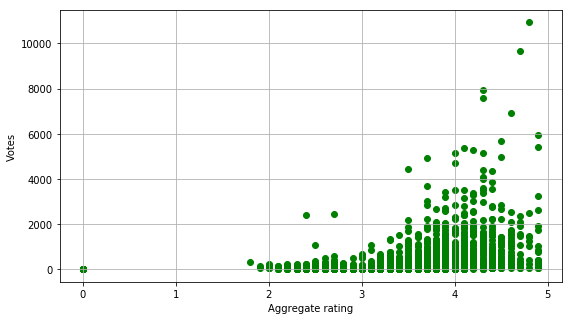

In [3]:
# 1 Number of Votes given Restaurant
votes  = np.array(df['Votes'])
rating = np.array(df['Aggregate rating'])
plt.figure(figsize =(9, 5)) 
plt.grid()
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.scatter(rating,votes,c ='green')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8] [2.0550855666774277, 2.563422391857511, 2.8905388471177957, 3.379166666666665, 3.4812903225806444, 3.651428571428572, 3.646153846153846, 3.266666666666667]


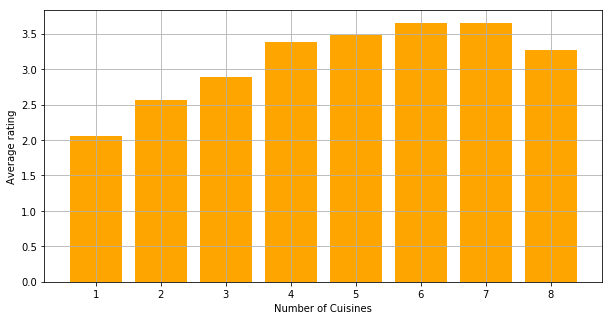

In [5]:
# 2 Restaurant serving more number of cuisines.
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
def count1(sumi) :
    return len(sumi.split(','))
df.dropna(subset = ['Cuisines','Aggregate rating'],inplace  = True)
df['count_cus']  =df.Cuisines.apply(count1)
res = df.groupby('count_cus')
num_cus, num_res = [] , []
for key ,data in res :
    num_cus.append(key)
    num_res.append(data['Aggregate rating'].mean())
plt.figure(figsize =(10, 5))
plt.grid()
plt.xlabel('Number of Cuisines')
plt.ylabel('Average rating')
plt.bar(num_cus,num_res,color ='orange')
print(num_cus,num_res)
plt.show()

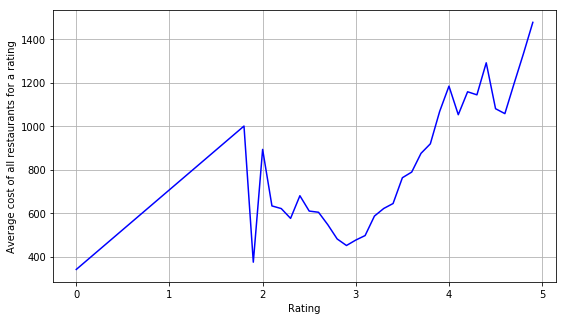

In [6]:
#Average Cost of Restaurant
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
df.sort_values('Aggregate rating',axis = 0,inplace =True)
res = df.groupby('Aggregate rating')
rating  , mean_avgcostof2= [] ,[]
for key ,data in res :
    rating.append(key)
    mean_avgcostof2.append(data['Average Cost for two'].mean())
plt.figure(figsize =(9, 5)) 
plt.xlabel('Rating')
plt.ylabel('Average cost of all restaurants for a rating')
plt.grid()
plt.plot(rating, mean_avgcostof2,color ='b')
plt.show()

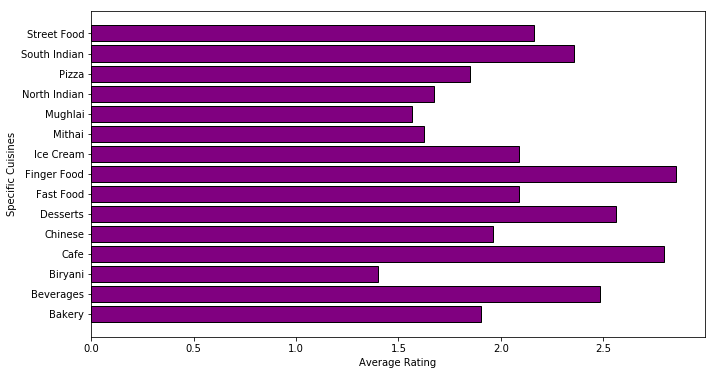

In [8]:
# 4 Restaurant serving some specific cuisines
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
def count1(sumi) :
    return len(sumi.split(','))
df.dropna(subset = ['Cuisines','Aggregate rating'],inplace  = True)
df['count_cus']  =df.Cuisines.apply(count1)
df =df[df.count_cus == 1]
res  = df.groupby('Cuisines')
spc_cus , rating = [] ,[]
for key,data in res :
  if data.shape[0] > 30 :
    spc_cus.append(key)
    rating.append(data['Aggregate rating'].mean())
plt.figure(figsize =(11, 6)) 
plt.xlabel('Average Rating')
plt.ylabel('Specific Cuisines')
plt.barh(spc_cus,rating,color ='purple',edgecolor = 'black')
plt.show()

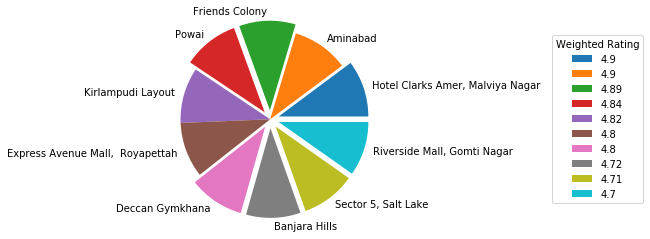

4.9 Hotel Clarks Amer, Malviya Nagar
4.9 Aminabad
4.89 Friends Colony
4.84 Powai
4.82 Kirlampudi Layout
4.8 Express Avenue Mall,  Royapettah
4.8 Deccan Gymkhana
4.72 Banjara Hills
4.71 Sector 5, Salt Lake
4.7 Riverside Mall, Gomti Nagar


In [9]:
### Question 2 Find the weighted restaurant rating of each locality and
#find out the top 10 localities with more weighted restaurant rating?
#1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes).
csv_data  = csv_data[csv_data["Country Code"]== 1]
df = csv_data.copy()
def crp(s) :
    return s.strip()
df['Locality'] = df['Locality'].apply(crp)
res = df.groupby('Locality')
df['weight1'] =  df['Aggregate rating']*df['Votes']
top_loc, weight , = [] , []
df.dropna(subset = ['Aggregate rating','Votes'],inplace = True)
for loc , data in res :
      #top_loc.append(loc)
      if data['Votes'].sum() != 0 :
        top_loc.append(loc)
        weight.append(round(data['weight1'].sum()/data['Votes'].sum(),2))
#print(sorted(weight))
dp = {'Locality':top_loc, 'Weighted Restaurant Rating':weight}
w_res = pd.DataFrame(dp)
w_res.sort_values('Weighted Restaurant Rating',axis =0 ,ascending = False,inplace =True)
w_res =w_res[:10]
explode = (0.1, 0.0, 0.1, 0.1, 0.0, 0.0,0.1,0.1,0.1,0.1) 
fig, ax = plt.subplots(figsize =(5, 4)) 
ps = plt.pie(w_res['Weighted Restaurant Rating'].values,labels= w_res['Locality'].values,explode = explode)
plt.axis('equal')
ax.legend(ps[0],w_res['Weighted Restaurant Rating'].values,loc ="right", bbox_to_anchor =(1.34, 0, 0.5, 1),title = 'Weighted Rating')
plt.show()
for i in range (10) :
    print(w_res['Weighted Restaurant Rating'].values[i], w_res['Locality'].values[i])